In [1]:
# magic function to plot inline
%matplotlib inline

# python standard modules
import time
import datetime as dt
from math import sqrt, pi


# import numpy, pyplot and scipy
import numpy as np
import polars as pl
import pandas as pd
import matplotlib as mat

mat.style.use("ggplot")
import matplotlib.pyplot as plt

# for plotting the vol surface
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.interpolate import interp1d
import streamlit as st

print(
    f"Numpy {np.__version__}\nMatplotlib {mat.__version__}\nScipy {scipy.__version__}\nPandas {pd.__version__}\nPolars {pl.__version__}\nStreamlit {st.__version__}"
)

Numpy 2.2.5
Matplotlib 3.10.0
Scipy 1.15.3
Pandas 2.2.3
Polars 1.30.0
Streamlit 1.46.0


In [2]:
# underlying stock price
S = 45.0

# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(35.0, 55.0, 0.01)

# strike price
K = 45.0

# time to expiration (you'll see this as T-t in the equation)
t = 164.0 / 365.0

# risk free rate (there's nuance to this which we'll describe later)
r = 0.02

# volatility (latent variable which is the topic of this talk)
vol = 0.25

# black scholes prices for demonstrating trades
atm_call_premium = 3.20
atm_put_premium = 2.79

otm_call_premium = 1.39
otm_put_premium = 0.92

In [ ]:
# use a lambda for a payoff functions
# equivelant to:
#
def call_payoff(S, K):
    return np.maximum(S - K, 0.0)
# call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)
# equivelant to:
#
def put_payoff(S, K):
    return np.maximum(K - S, 0.0)
# put_payoff = lambda S, K: np.maximum(K - S_, 0.0)

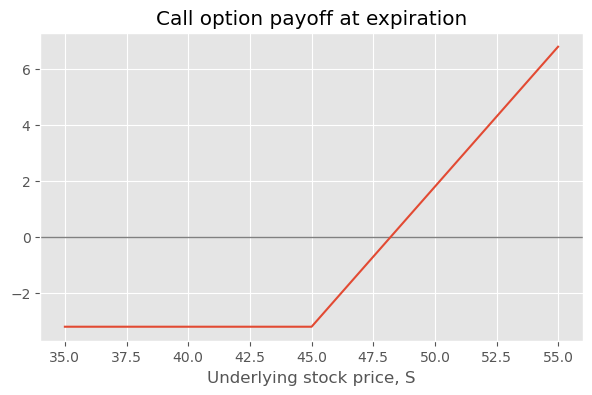

In [4]:
# plot the call payoff
plt.figure(1, figsize=(7, 4))
plt.title("Call option payoff at expiration")
plt.xlabel("Underlying stock price, S")
plt.axhline(y=0, lw=1, c="grey")
plt.plot(S_, -atm_call_premium + call_payoff(S_, K))